In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
from sklearn.metrics import mean_absolute_error,mean_squared_error

import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [2]:
df = pd.read_csv('goog.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


In [3]:
df.tail()

,Date,Open,High,Low,Close,Volume
56,3/13/2017,844.000000,848.684998,843.250000,845.539978,1149500
57,3/14/2017,843.640015,847.239990,840.799988,845.619995,779900
58,3/15/2017,847.590027,848.630005,840.770020,847.200012,1379600
59,3/16/2017,849.030029,850.849976,846.130005,848.780029,970400
60,3/17/2017,851.609985,853.400024,847.109985,852.119995,1712300


In [4]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,814.005573,817.755576,809.734066,814.561804,1.361269e+06
std,18.784303,18.556004,19.384799,19.265955,4.987376e+05
min,778.809998,782.780029,770.409973,771.820007,6.234000e+05
25%,799.679993,802.700012,793.270020,801.340027,1.057900e+06
50%,809.510010,815.250000,804.539978,809.559998,1.247700e+06
75%,828.659973,833.250000,825.059998,830.630005,1.494500e+06
max,851.609985,853.400024,847.109985,852.119995,3.228900e+06


In [6]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [8]:
train_data = scaled_data[:int(len(scaled_data)*0.8)]
test_data = scaled_data[int(len(scaled_data)*0.8):]

In [9]:
def create_sequence(data,time_steps = 6):
    X = []
    Y = []
    
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps,0])
        Y.append(data[i+time_steps,0])
    return np.array(X),np.array(Y)


In [10]:
X_train,Y_train = create_sequence(train_data)
X_test,Y_test = create_sequence(test_data)

In [11]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units = 50))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.fit(X_train,Y_train,epochs = 100, batch_size = 4)

Epoch 1/100
 1/11 [=>............................] - ETA: 1s - loss: 0.4322

C:\Users\shrey\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11/11 [==============================] - 1s 40ms/step - loss: 0.1613
Epoch 2/100
11/11 [==============================] - 0s 35ms/step - loss: 0.0325
Epoch 3/100
11/11 [==============================] - 0s 36ms/step - loss: 0.0241
Epoch 4/100
11/11 [==============================] - 0s 39ms/step - loss: 0.0251
Epoch 5/100
11/11 [==============================] - 0s 36ms/step - loss: 0.0235
Epoch 6/100
11/11 [==============================] - 0s 36ms/step - loss: 0.0236
Epoch 7/100
11/11 [==============================] - 0s 36ms/step - loss: 0.0228
Epoch 8/100
11/11 [==============================] - 0s 35ms/step - loss: 0.0228
Epoch 9/100
11/11 [==============================] - 0s 36ms/step - loss: 0.0227
Epoch 10/100
11/11 [==============================] - 0s 36ms/step - loss: 0.0247
Epoch 11/100
11/11 [==============================] - 0s 37ms/step - loss: 0.0232
Epoch 12/100
11/11 [==============================] - 0s 36ms/step - loss: 0.0228
Epoch 13/100
11/11 [=================

In [13]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

Y_test = scaler.inverse_transform(Y_test.reshape(-1,1))

1/1 [==============================] - 0s 28ms/step


In [14]:
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)

print('MSE ',mse)
print('MAE ',mae)
print('RMSE ',rmse)

MSE  43.71590836357267
MAE  6.421020444754455
RMSE  6.611800689946172


In [17]:
last_6_days = df['Close'][-6:].values
last_6_days_scaled = scaler.transform(last_6_days.reshape(-1,1))

X_pred = []
X_pred.append(last_6_days_scaled)
X_pred = np.array(X_pred)
X_pred = np.reshape(X_pred,(X_pred.shape[0],X_pred.shape[1],1))

In [18]:
prediction = model.predict(X_pred)
prediction = scaler.inverse_transform(prediction)

print('Prediction for next day is ',prediction)

1/1 [==============================] - 0s 27ms/step
Prediction for next day is  [[850.0285]]


C:\Users\shrey\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


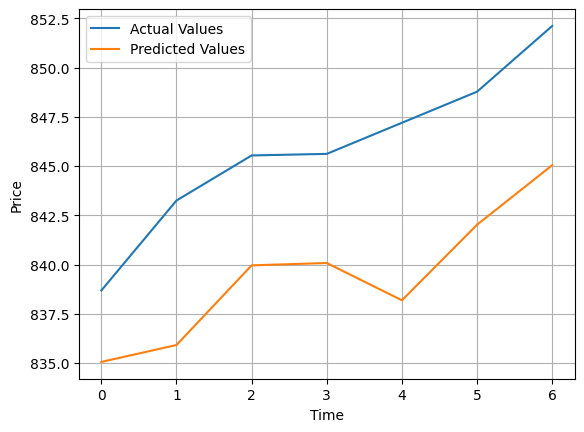

In [20]:
import matplotlib.pyplot as plt

plt.plot(Y_test, label = 'Actual Values')
plt.plot(y_pred, label = 'Predicted Values')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()